In [4]:
###
# Developed By Prathamesh Patil In Completion of 
#
#
###
## Define Parameters

n <- 0.001
l <- 0  
r <- 8

m <- 1

s <- (r - l)/n 
x <- seq(l,r,n)

step   <- 0 
stop   <- 100

## Define  Vectors 

guess <- 1:2
error <- 1:stop


g <- x*0
h <- g
j <- g

                                                                      
f1 <- function(x,g,h,j){ return(h) }                                     
f2 <- function(x,g,h,j){ return(j) }                                     
f3 <- function(x,g,h,j){ return( -(m+1)/2 * g * j - m*(1-h^2)  )  }      




In [5]:
## Define Runge Kutta
falkner <- function(x,g,h,j,guess){
    
g <- x*0
h <- g
j <- g
    
        g[1] <- 0
        h[1] <- 0
        j[1] <- guess

    for(i in 1:(s)){

        K1 <- f1(x[i],g[i],h[i],j[i])
        L1 <- f2(x[i],g[i],h[i],j[i])
        M1 <- f3(x[i],g[i],h[i],j[i])

        K2 <-  f1( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )
        L2 <-  f2( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )
        M2 <-  f3( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )

        K3 <-  f1( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )
        L3 <-  f2( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )
        M3 <-  f3( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )

        g[i+1] <-  g[i] + n*(K1 + 4*K2 + K3)/6
        h[i+1] <-  h[i] + n*(L1 + 4*L2 + L3)/6
        j[i+1] <-  j[i] + n*(M1 + 4*M2 + M3)/6

        i <- i+1

    }
    
    return(list(g = g, h = h, j = j))
    
    
}

In [6]:
## Guessing Function objective 

objective <- function(l,u){
    
    v <- falkner(x,g,h,j,l)
    w <- falkner(x,g,h,j,u)

    guess[c(1,2)] <- c(l,u)

    model <- lm(formula = y ~ x, data.frame(y = guess[1:2] , x =  c(v$h[s], w$h[s]) ) )

    newguess <- predict(model,  newdata = data.frame(x = 1))
    
    return(list( newguess = newguess, v = v, w = w))
}


## Guess update function
update <- function(n,guess){

    guess[which.min(abs(n - guess)) ] <- n
    return( guess)
    
 }


In [7]:
## Main loop

m <- 5.0

guess <- c(2.6852799545468, 2.69)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}

data1 <- data$v

[1] "1 2.6852799550831 2.69 0.999978279830408 192.162847865421"
[1] "2 2.68527995559896 2.69 0.999979107570041 192.162847865421"
[1] "3 2.68527995609516 2.69 0.99997990375911 192.162847865421"
[1] "4 2.68527995657245 2.69 0.999980669612497 192.162847865421"
[1] "5 2.68527995703155 2.69 0.999981406271788 192.162847865421"
[1] "6 2.68527995747315 2.69 0.999982114869278 192.162847865421"
[1] "7 2.68527995789793 2.69 0.999982796454769 192.162847865421"
[1] "8 2.68527995830652 2.69 0.999983452072005 192.162847865421"
[1] "9 2.68527995869953 2.69 0.999984082696607 192.162847865421"
[1] "10 2.68527995907757 2.69 0.999984689291912 192.162847865421"
[1] "11 2.68527995944121 2.69 0.999985272766025 192.162847865421"
[1] "12 2.68527995979098 2.69 0.999985834014392 192.162847865421"
[1] "13 2.68527996012743 2.69 0.999986373867074 192.162847865421"
[1] "14 2.68527996045105 2.69 0.999986893154942 192.162847865421"
[1] "15 2.68527996076234 2.69 0.999987392640763 192.162847865421"
[1] "16 2.68527996106

In [8]:
## Main loop

m <- 1.0

guess <- c(1.2, 1.24)

newguess <- guess

step <- 0

while(step < 30){
    

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}

data2 <- data$w

[1] "1 1.2 1.23053937092077 -0.46467815793657 1.45373484636046"
[1] "2 1.2 1.23319805538428 -0.46467815793657 0.882700446834314"
[1] "3 1.2 1.23240968275109 -0.46467815793657 1.03562861707172"
[1] "4 1.2 1.2326398830217 -0.46467815793657 0.989670020934529"
[1] "5 1.2 1.23257235991677 -0.46467815793657 1.00303630492856"
[1] "6 1.2 1.23259213972519 -0.46467815793657 0.999111103057069"
[1] "7 1.2 1.23258634329127 -0.46467815793657 1.000260535835"
[1] "8 1.2 1.23258804173102 -0.46467815793657 0.999923663175855"
[1] "9 1.2 1.23258754404674 -0.46467815793657 1.00002236889328"
[1] "10 1.2 1.23258768987895 -0.46467815793657 0.99999344546212"
[1] "11 1.2 1.23258764714685 -0.46467815793657 1.00000192062864"
[1] "12 1.2 1.2325876596683 -0.46467815793657 0.999999437213606"
[1] "13 1.2 1.23258765599924 -0.46467815793657 1.00000016490891"
[1] "14 1.2 1.23258765707435 -0.46467815793657 0.999999951678042"
[1] "15 1.2 1.23258765675932 -0.46467815793657 1.00000001415943"
[1] "16 1.2 1.23258765685163 -0.

In [9]:
## Main loop

m <- 1/3
guess <- c(0.6, 0.8)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data3 <- data$w

[1] "1 0.6 0.760710367589341 -0.853358855719141 1.45309950601516"
[1] "2 0.6 0.757713692896487 -0.853358855719141 1.03521516412247"
[1] "3 0.6 0.757469393111069 -0.853358855719141 1.00287532174862"
[1] "4 0.6 0.75744936940983 -0.853358855719141 1.00023570182691"
[1] "5 0.6 0.757447727470449 -0.853358855719141 1.00001932770286"
[1] "6 0.6 0.75744759282689 -0.853358855719141 1.0000015849263"
[1] "7 0.6 0.757447581785714 -0.853358855719141 1.00000012996873"
[1] "8 0.6 0.757447580880304 -0.853358855719141 1.00000001065783"
[1] "9 0.6 0.757447580806059 -0.853358855719141 1.00000000087395"
[1] "10 0.6 0.757447580799971 -0.853358855719141 1.00000000007167"
[1] "11 0.6 0.757447580799471 -0.853358855719141 1.00000000000588"
[1] "12 0.6 0.757447580799428 -0.853358855719141 1.0000000000005"
[1] "13 0.6 0.757447580799427 -0.853358855719141 1.00000000000001"
[1] "14 0.6 0.757447580799427 -0.853358855719141 1"
[1] "15 0.6 0.757447580799426 -0.853358855719141 1"
[1] "16 0.6 0.757447580799426 -0.85335

In [10]:
## Main loop

m <- 1/9
guess <- c(0.3, 0.6)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data4 <- data$w

[1] "1 0.3 0.530800919216196 -0.140746887783929 1.34202045775948"
[1] "2 0.3 0.516217646618232 -0.140746887783929 1.07694017158186"
[1] "3 0.3 0.512868439945345 -0.140746887783929 1.01794816126628"
[1] "4 0.3 0.512083752452726 -0.140746887783929 1.00422064304661"
[1] "5 0.3 0.511899043696877 -0.140746887783929 1.00099436946342"
[1] "6 0.3 0.511855516793355 -0.140746887783929 1.00023437284278"
[1] "7 0.3 0.511845256941682 -0.140746887783929 1.0000552473727"
[1] "8 0.3 0.511842838414167 -0.140746887783929 1.00001302346474"
[1] "9 0.3 0.511842268292871 -0.140746887783929 1.00000307003932"
[1] "10 0.3 0.511842133897293 -0.140746887783929 1.00000072370559"
[1] "11 0.3 0.51184210221599 -0.140746887783929 1.00000017060041"
[1] "12 0.3 0.511842094747701 -0.140746887783929 1.00000004021593"
[1] "13 0.3 0.511842092987188 -0.140746887783929 1.00000000948017"
[1] "14 0.3 0.511842092572179 -0.140746887783929 1.00000000223478"
[1] "15 0.3 0.511842092474348 -0.140746887783929 1.00000000052681"
[1] "1

In [11]:
## Main loop

m <- 0
guess <- c(0.3, 0.6)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data5 <- data$v

[1] "1 0.335768220759995 0.6 0.934548024428194 1.48351557870764"
[1] "2 0.331642775904413 0.6 1.00743306562175 1.48351557870764"
[1] "3 0.332106106955817 0.6 0.999163744350768 1.48351557870764"
[1] "4 0.332053915608763 0.6 1.00009418062381 1.48351557870764"
[1] "5 0.332059792674599 0.6 0.999989394451407 1.48351557870764"
[1] "6 0.332059130856048 0.6 1.00000119429179 1.48351557870764"
[1] "7 0.332059205383363 0.6 0.999999865510894 1.48351557870764"
[1] "8 0.332059196990843 0.6 1.00000001514482 1.48351557870764"
[1] "9 0.332059197935925 0.6 0.999999998294541 1.48351557870764"
[1] "10 0.332059197829497 0.6 1.00000000019206 1.48351557870764"
[1] "11 0.332059197841484 0.6 0.999999999978369 1.48351557870764"
[1] "12 0.332059197840137 0.6 1.00000000000243 1.48351557870764"
[1] "13 0.332059197840287 0.6 0.99999999999973 1.48351557870764"
[1] "14 0.33205919784027 0.6 1.00000000000003 1.48351557870764"
[1] "15 0.332059197840272 0.6 0.999999999999996 1.48351557870764"
[1] "16 0.332059197840273 0.

In [12]:
## Main loop

m <- -0.06542
guess <- c(0.1, 0.2)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data6 <- data$w

[1] "1 0.1 0.162283588391087 0.941582780900787 1.03537509539045"
[1] "2 0.1 0.164045466443803 0.941582780900787 0.998392953913109"
[1] "3 0.1 0.163947784911049 0.941582780900787 1.0000892334818"
[1] "4 0.1 0.163953155339708 0.941582780900787 0.999995094448335"
[1] "5 0.1 0.163952859942219 0.941582780900787 1.00000026982843"
[1] "6 0.1 0.163952876189987 0.941582780900787 0.999999985158613"
[1] "7 0.1 0.163952875296312 0.941582780900787 1.00000000081632"
[1] "8 0.1 0.163952875345459 0.941582780900787 0.999999999955107"
[1] "9 0.1 0.163952875342756 0.941582780900787 1.00000000000247"
[1] "10 0.1 0.163952875342903 0.941582780900787 0.999999999999866"
[1] "11 0.1 0.1639528753429 0.941582780900787 1"
[1] "12 0.1 0.1639528753429 0.941582780900787 1"
[1] "13 0.1 0.1639528753429 0.941582780900787 1"
[1] "14 0.1 0.1639528753429 0.941582780900787 1"
[1] "15 0.1 0.163952875342899 0.941582780900787 1"
[1] "16 0.1 0.163952875342901 0.941582780900787 0.999999999999999"
[1] "17 0.1 0.1639528753429 0.9

In [13]:
## Main loop

m <- -0.08257
guess <- c(0, 0.2)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data7 <- data$v

[1] "1 0.0591360783362489 0.2 0.966365738190693 1.08011782576763"
[1] "2 0.0817033080664888 0.2 0.984716078277137 1.08011782576763"
[1] "3 0.0865235192009857 0.2 0.996596785227057 1.08011782576763"
[1] "4 0.0873973666566852 0.2 0.999378249370157 1.08011782576763"
[1] "5 0.0875507363503376 0.2 0.999890727195579 1.08011782576763"
[1] "6 0.0875774991766076 0.2 0.999980927488391 1.08011782576763"
[1] "7 0.0875821645326575 0.2 0.999996675098915 1.08011782576763"
[1] "8 0.0875829776644417 0.2 0.999999420493896 1.08011782576763"
[1] "9 0.0875831193820193 0.2 0.999999899000007 1.08011782576763"
[1] "10 0.0875831440812946 0.2 0.999999982397193 1.08011782576763"
[1] "11 0.087583148386001 0.2 0.9999999969321 1.08011782576763"
[1] "12 0.087583149136252 0.2 0.999999999465307 1.08011782576763"
[1] "13 0.0875831492670101 0.2 0.999999999906811 1.08011782576763"
[1] "14 0.0875831492898 0.2 0.999999999983758 1.08011782576763"
[1] "15 0.0875831492937682 0.2 0.999999999997172 1.08011782576763"
[1] "16 0.0

In [14]:
## Main loop

m <- -0.09041
guess <- c(0.0, 0.2)

newguess <- guess

step <- 0

while(step < 30){

    data <- objective(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}
data8 <- data$v

[1] "1 0.00360615379173979 0.2 0.998225867602822 1.09662058394809"
[1] "2 0.0067505675757884 0.2 0.998427860345161 1.09662058394809"
[1] "3 0.00933445327107507 0.2 0.998690604836496 1.09662058394809"
[1] "4 0.0113558460735963 0.2 0.998964674235046 1.09662058394809"
[1] "5 0.0128770299755787 0.2 0.999214539631972 1.09662058394809"
[1] "6 0.0139886179963988 0.2 0.999422603700244 1.09662058394809"
[1] "7 0.0147835338617148 0.2 0.999585321776742 1.09662058394809"
[1] "8 0.0153432365274178 0.2 0.999707138815928 1.09662058394809"
[1] "9 0.0157330273028473 0.2 0.999795612790571 1.09662058394809"
[1] "10 0.0160024173157169 0.2 0.99985853824831 1.09662058394809"
[1] "11 0.0161876126923637 0.2 0.999902652450696 1.09662058394809"
[1] "12 0.0163144639837194 0.2 0.99993327484509 1.09662058394809"
[1] "13 0.0164011349943605 0.2 0.999954388586992 1.09662058394809"
[1] "14 0.0164602517448325 0.2 0.999968879248196 1.09662058394809"
[1] "15 0.0165005272281395 0.2 0.999978793177675 1.09662058394809"
[1] 

In [15]:
# Data Preperation
DATA <- list(data1 ,data2, data3, data4, data5, data6, data7, data8)
labels <- c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041")

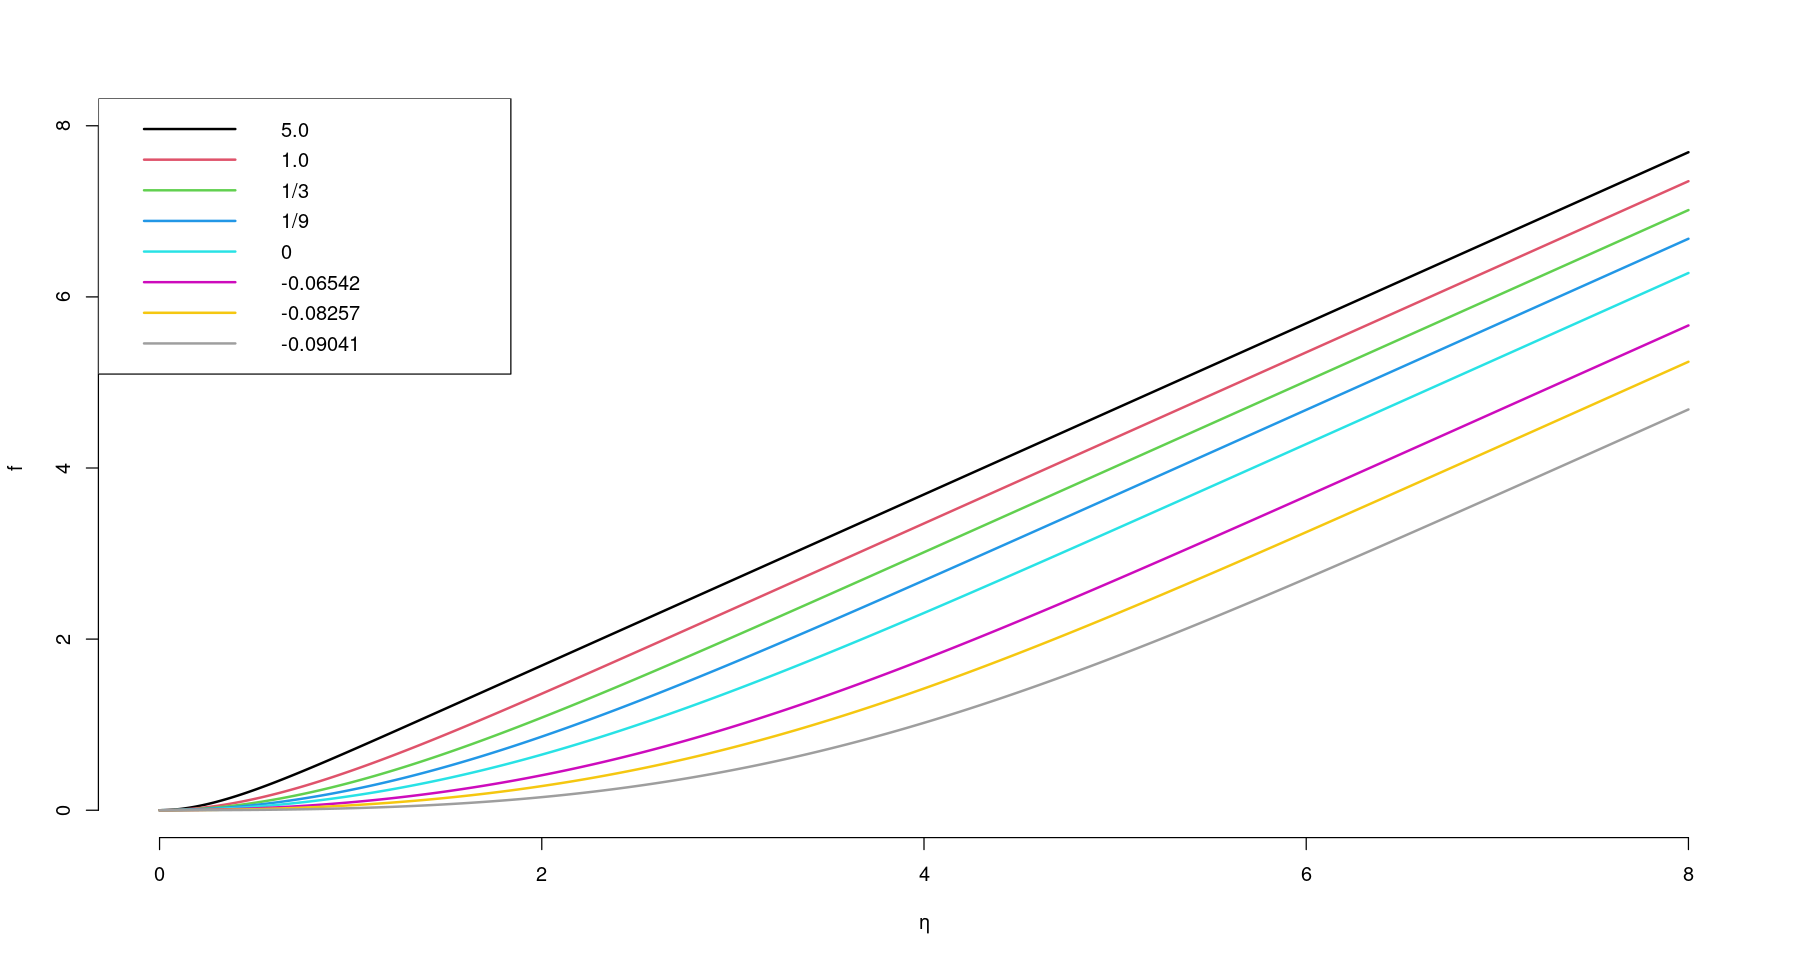

In [16]:
options(repr.plot.width=15, repr.plot.height=8)
plot(y = (DATA[[1]]$g),x = x, typ = "l", xlab = "\u03B7", ylab = "f", bty = "n", ylim = c(0,8), lwd = 2 )
legend(x = "topleft", legend = c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041"), lwd = 2, col = 1:8, lty = 1)
for(i in 2:8){
    
    lines(y = (DATA[[i]]$g),x = x, typ = "l", col = i, lwd = 2)
}


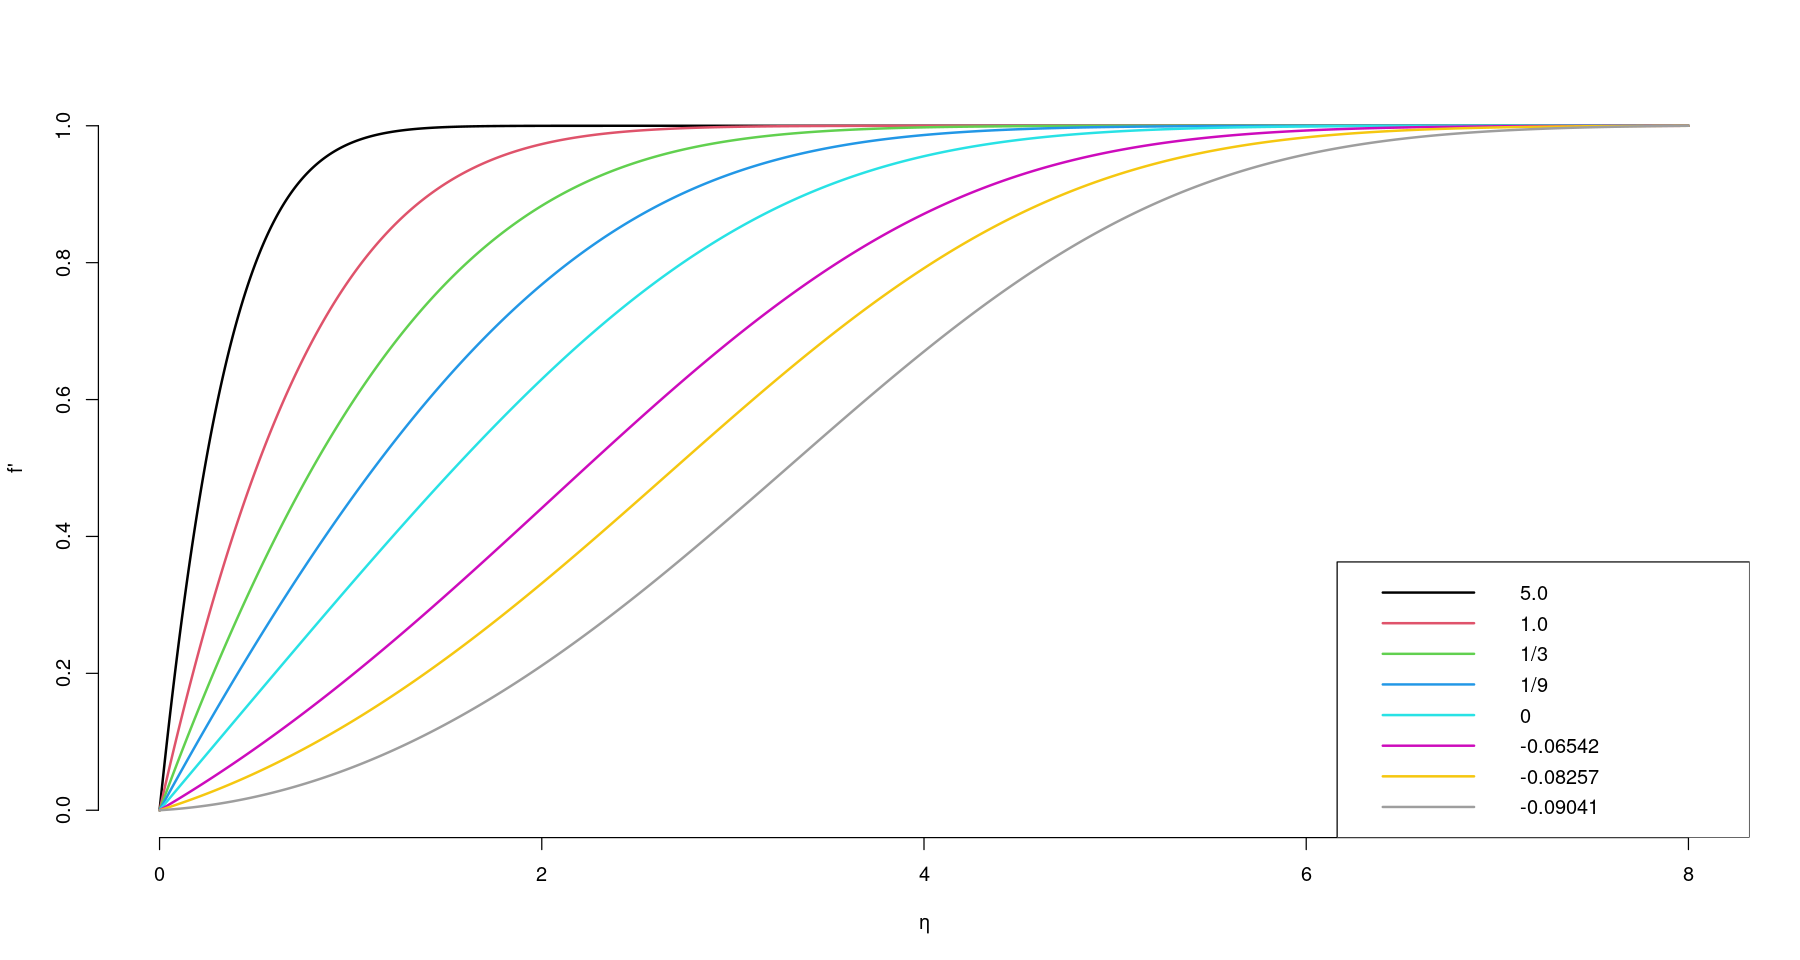

In [17]:
options(repr.plot.width=15, repr.plot.height=8)
plot(y = (DATA[[1]]$h),x = x, typ = "l", xlab = "\u03B7", ylab = "f'", bty = "n",  lwd = 2 )
legend(x = "bottomright", legend = c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041"), lwd = 2 , col = 1:8, lty = 1)
for(i in 2:8){
    lines(y = (DATA[[i]]$h),x = x, typ = "l", col = i,  lwd = 2 )
}

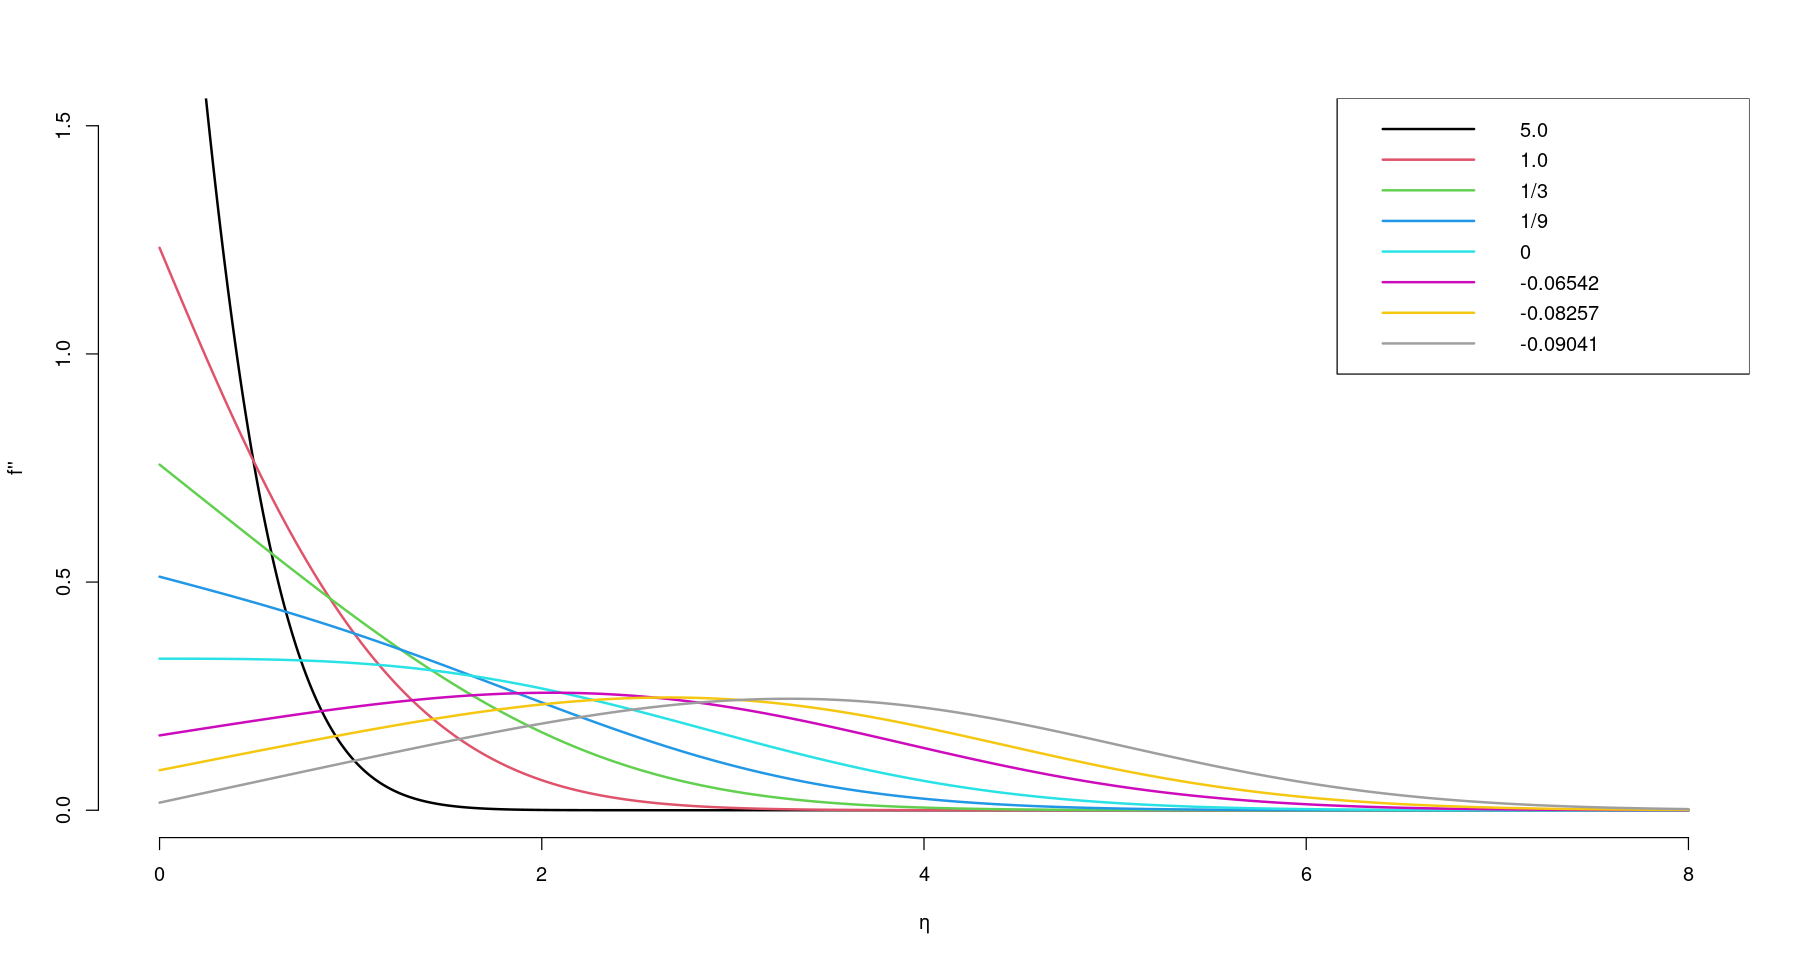

In [18]:
options(repr.plot.width=15, repr.plot.height=8)
plot(y = (DATA[[1]]$j),x = x, typ = "l", xlab = "\u03B7", ylab = "f''", bty = "n", ylim = c(0,1.5),  lwd = 2 )
legend(x = "topright", legend = c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041"),  lwd = 2 , col = 1:8, lty = 1)
for(i in 2:8){
    
    lines(y = (DATA[[i]]$j),x = x, typ = "l", col = i,  lwd = 2 )
}

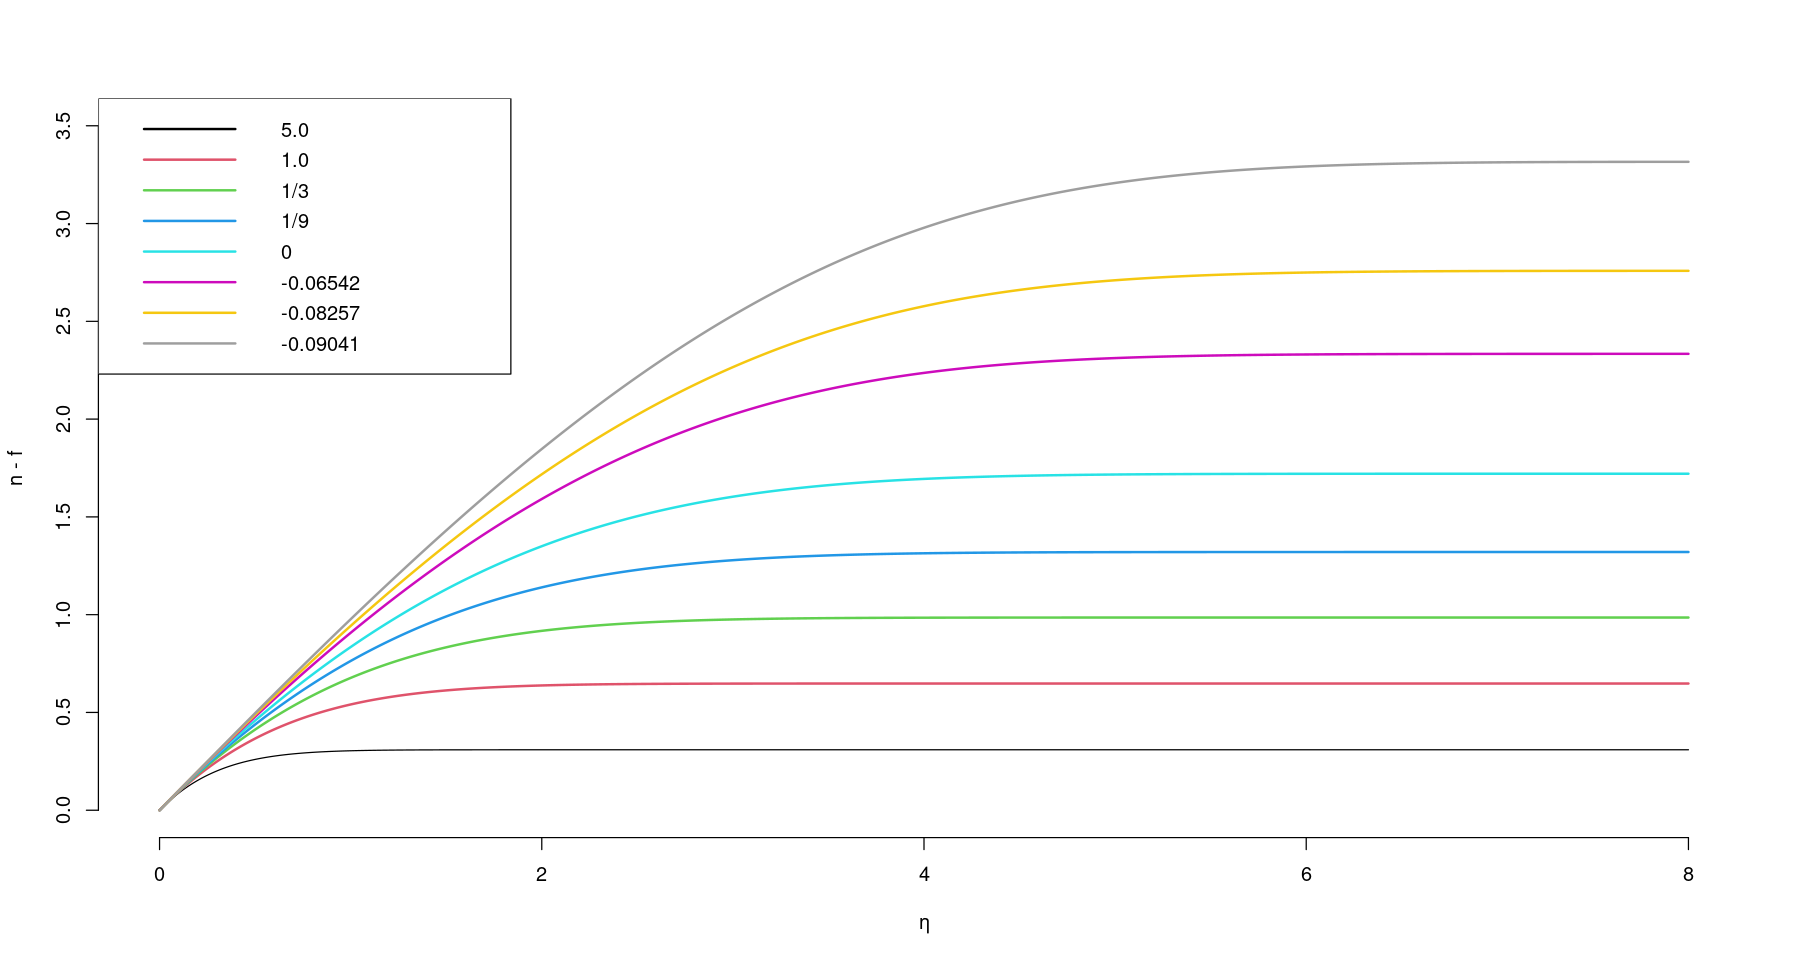

In [19]:
options(repr.plot.width=15, repr.plot.height=8)
plot(y = (x - DATA[[1]]$g ),x = x, typ = "l", xlab = "\u03B7", ylab = "n - f", bty = "n", ylim = c(0,3.5) )
legend(x = "topleft", legend = c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041"),  lwd = 2 , col = 1:8, lty = 1)
for(i in 2:8){
    
    lines(y = (x - DATA[[i]]$g),x = x, typ = "l", col = i,  lwd = 2 )
}


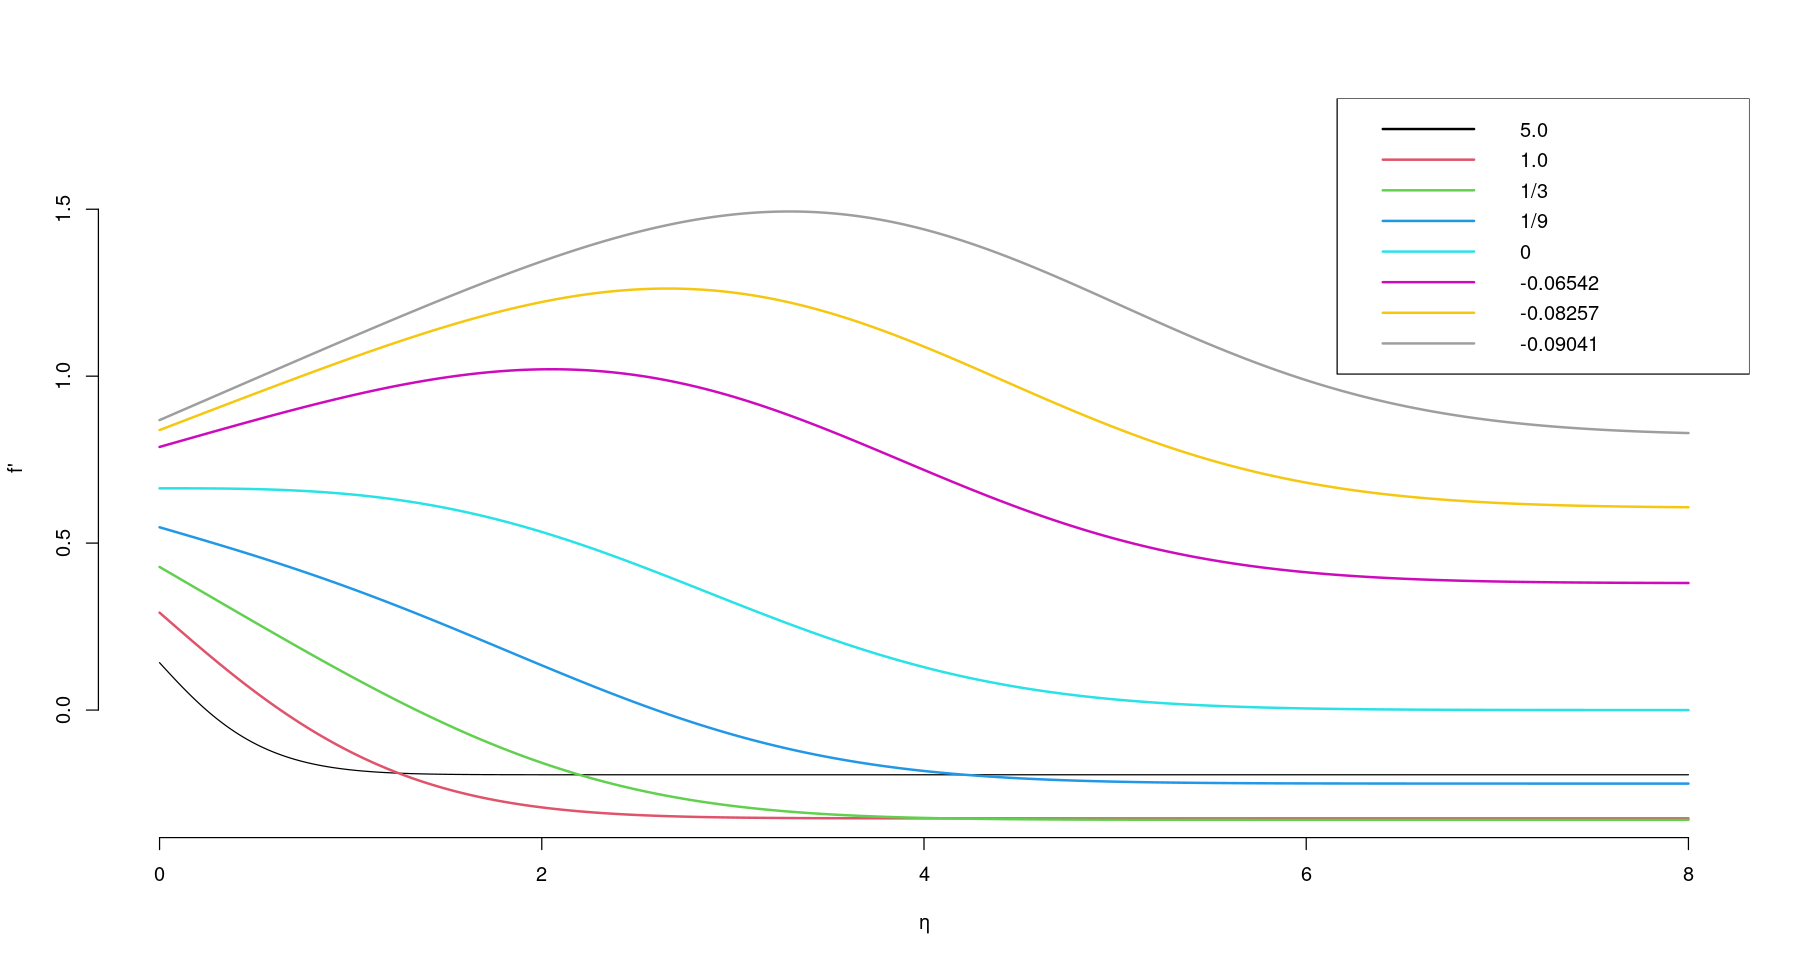

In [20]:
options(repr.plot.width=15, repr.plot.height=8)
angle <- c(5,1,1/3,1/9,0,-0.06542,-0.08257,-0.09041)
plot(y = 2 * ( DATA[[1]]$j - angle[1] * (r - DATA[[1]]$g[s]) )/(3*angle[1] + 1 ),x = x, typ = "l", xlab = "\u03B7", ylab = "f'", bty = "n", ylim = c(-0.3,1.75))
legend(x = "topright", legend = c("5.0","1.0","1/3","1/9","0","-0.06542","-0.08257","-0.09041"), lwd = 2 , col = 1:8, lty = 1)
for(i in 2:8){
    lines(y = 2 * ( DATA[[i]]$j - angle[i] * (r - DATA[[i]]$g[s]) )/(3*angle[i] + 1 ),x = x, typ = "l", col = i,  lwd = 2 )
}

In [25]:
## Displacement Thickness 

angle <- c(5,1,1/3,1/9,0,-0.06542,-0.08257,-0.09041)

print("Displacement Thickness")
for(i in 1:8){
print(r - DATA[[i]]$g[s])
}

print("Momentum Thickness")
## Momentum Thickness 
for(i in 1:8){
print( 2 * ( DATA[[i]]$j[1] - angle[i] * (r - DATA[[i]]$g[s]) )/(3*angle[i] + 1 ) )
}

[1] "Displacement Thickness"
[1] 0.3100908
[1] 0.6489005
[1] 0.9863668
[1] 1.321386
[1] 1.72176
[1] 2.334761
[1] 2.759199
[1] 3.316656
[1] "Momentum Thickness"
[1] 0.1418532
[1] 0.2918436
[1] 0.4286587
[1] 0.5475321
[1] 0.6641184
[1] 0.7880482
[1] 0.8385336
[1] 0.8684352


In [39]:

2*(DATA[[7]]$j[1] - angle[7]*(r - DATA[[7]]$g[s] ))/(3*angle[7]+1)

[1] 0.8385336